In [22]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

# Bayes' Theorem

Bayes' theorem is one of the fundamental rules of probabilities. Mathematically, it is as simple as applying the Chain rule twice

\begin{align}
    P(A, B) = P(B | A) P(A) \\
    P(A, B) = P(A | B) P(B),
\end{align}

setting these two equal and rearranging the terms

\begin{align}
    P(A | B) = \frac{P(B | A) P(A)}{P(B)}.
\end{align}

Despite its simplicity it is one of the most powerful tools to analyzing data and modeling cognition, as we will see in the following weeks. Bayes' rule gives us a method for inferring the probability of $A$ given $B$ from the probability of $B$ given $A$. This is what we call Bayesian inference.

From the scientists' point of view, $B$ is often some measurement in a study and $A$ is a parameter of a model. The likelihood $P(B | A)$ then tells you how likely the measurements you made are given different parameter values. Often, we have prior knowledge (e.g. from previous studies or from theoretical considerations), which we can quantify in a prior distribution $P(A)$. What we are then interested in, is the posterior probability of the parameter $A$ given the data we have observed.

Let's make this more concrete with an example.



## Baggage Claim Example

Suppose you are out of town and have just landed back at the airport. With you, 99 other passengers have traveled, each has a suitcase with them and now you are all waiting at the baggage claim. You have noticed lately that your suitcase model is very popular and about $k\%$ also own this model. Now you are waiting at the baggage carousel and you just see the $n$-th suitcase coming out. Since you are standing a little far away, you cannot see any peculiarities that would allow you to identify your suitcase. You can only see whether it is your model or not. What is the probability that it really is your suitcase? We want to deal with this question with Bayes' theorem.


### Prior
What is your previous knowledge in this scene? You' re expecting the suitcases to be placed on the baggage carousel in the same way. So, if you see the $n$-th suitcase and your suitcase was not yet there, then statistically speaking this suitcase should be yours with a probability of $1/(100-n+1)$. We can define this in Prior in this way.

In [23]:
def prior(n):
    return 1/(100-n+1), 1-1/(100-n+1)

### Likelihood

You will now see any case that corresponds to your model. So you make a sensory measurement that this is exactly your suitcase model and therefore could actually be your suitcase. Under the hypothesis that this is your suitcase, the likelihood returns 1 when you see the actual model. Under the hypothesis that this is not your suitcase, then you know that k% of the other passengers also have this suitcase and the probability that this data point occurs under the hypothesis is only k%.

Please note two important findings here:

1. the likelihood depends on the underlying hypothesis (here "my suitcase" vs. "not my suitcase")

2. the likelihood, unlike the prior, does not add up to 1! It is not a probability distribution but a function.

In [24]:
def likelihood(k):
    return 1.0,k

### Posterior
Using the Bayes Theorem we can now determine the posterior.

In [25]:
def posterior(n,k):
    like1,like2 = likelihood(k)
    prior1,prior2 = prior(n)
    post1 = like1*prior1 / (like1*prior1+like2*prior2)
    post2 = like2*prior2 / (like2*prior2+like1*prior1)
    print(post1)
    return post1,post2

### Visualization

In the following you will find the three components of the Bayes Theorem presented as a bar chart. You can play around with the parameters n and k to observe the effects.

1. check again with pen and paper that the outputted probabilities for the posterior are correct

2. what can you say about the influence of the prior and likelihood on the overall result?

3. consider in this baggage example which factors could influence the Prior and the Likelihood respectively.

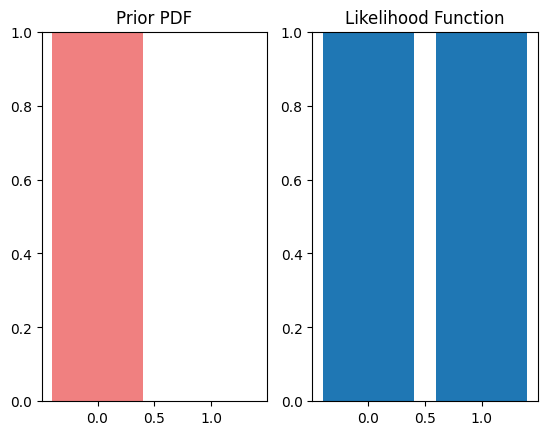

1.0


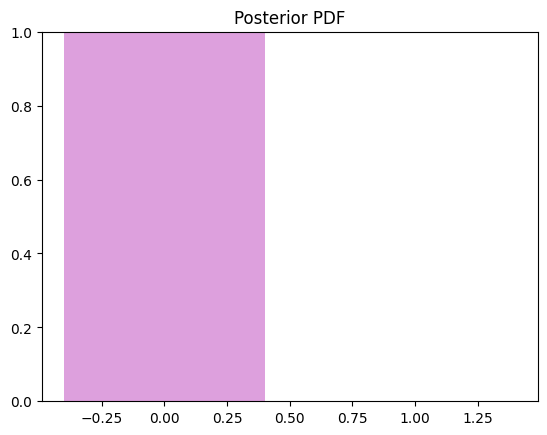

In [34]:
def visualize_posterior(n,k):
    # plot prior
    plt.subplot(1,2,1)
    plt.bar((0,1),prior(n), color = 'lightcoral')
    plt.ylim([0,1])
    plt.title("Prior PDF")
    # plot likelihood
    plt.subplot(1,2,2)
    plt.bar((0,1),likelihood(k))
    plt.ylim([0,1])
    plt.title("Likelihood Function")
    plt.show()
    # plot posterior
    post = posterior(n,k)
    plt.bar((0,1),post,color = 'plum')
    plt.ylim([0,1])
    plt.title("Posterior PDF")
    plt.show()
    
visualize_posterior(n=100, k=5)



# interact(visualize_posterior, 
  #        n = widgets.FloatSlider(value=1, min=1, max=100, step=10, description="$n$"),
    #      k = widgets.FloatSlider(value=0.05, min=0.01, max=1.0, step=0.10, description="$k$"));

In [39]:
prior1, prior2 = prior(100)
print(prior1, prior2)

like1, like2 = likelihood(5)
print(like1, like2)

posterior1, posterior2 = posterior(100, 5)
print(posterior1, posterior2)

posterior1, posterior2 = posterior(100, 0.05)
print(posterior1, posterior2)

1.0 0.0
1.0 5
1.0
1.0 0.0
1.0
1.0 0.0
